In [248]:
# Import and configuration
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd
 
from config import *

In [249]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path, 
                            encoding="iso-8859-1", low_memory=False)
census_data = pd.read_csv(census_data_path, 
                          encoding="iso-8859-1", low_memory=False)



In [250]:
census_data.head()
census_data = census_data.rename(columns={"State":"State Name"})
census_data.head()

,State Name,2013,2014,2015,2016,2017
0,Alabama,4833722,4849377,4858979,4863300,4874747
1,Alaska,735132,736732,738432,741894,739795
2,Arizona,6626624,6731484,6828065,6931071,7016270
3,Arkansas,2959373,2966369,2978204,2988248,3004279
4,California,38332521,38802500,39144818,39250017,39536653


In [251]:
# Your code for geography-related analysis starts here
clean_incident_data = incident_data.loc[:,['Year','State Name',
                                        'Number of Killed',
                                        'Number of Injured'    
]]
clean_incident_data.head(5)

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [252]:
#create group based on values in the year column
killed_data = clean_incident_data["Number of Killed"].value_counts()
injured_data = clean_incident_data["Number of Injured"].value_counts()

grouped_year_df = clean_incident_data.groupby('Year')

count_years = grouped_year_df['Year'].count()
count_years

Year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: Year, dtype: int64

In [253]:
year_counts = clean_incident_data["Year"].value_counts()
year_counts = year_counts.head()
year_counts = pd.DataFrame(year_counts)
year_counts = year_counts.reset_index()
year_counts = year_counts.rename(columns={'index':'Year', 'Year': 'Total Incidents'})
year_counts.head()
year_counts

year_counts = year_counts.sort_values("Year")

year_counts.drop(year_counts.index[4], inplace=True)
year_counts.head(5) 


,Year,Total Incidents
3,2014,51854
2,2015,53579
1,2016,58763
0,2017,61401


In [254]:
x_axis = np.arange(len(year_counts))
tick_locations = [value+0.3 for value in x_axis]

<IPython.core.display.Javascript object>


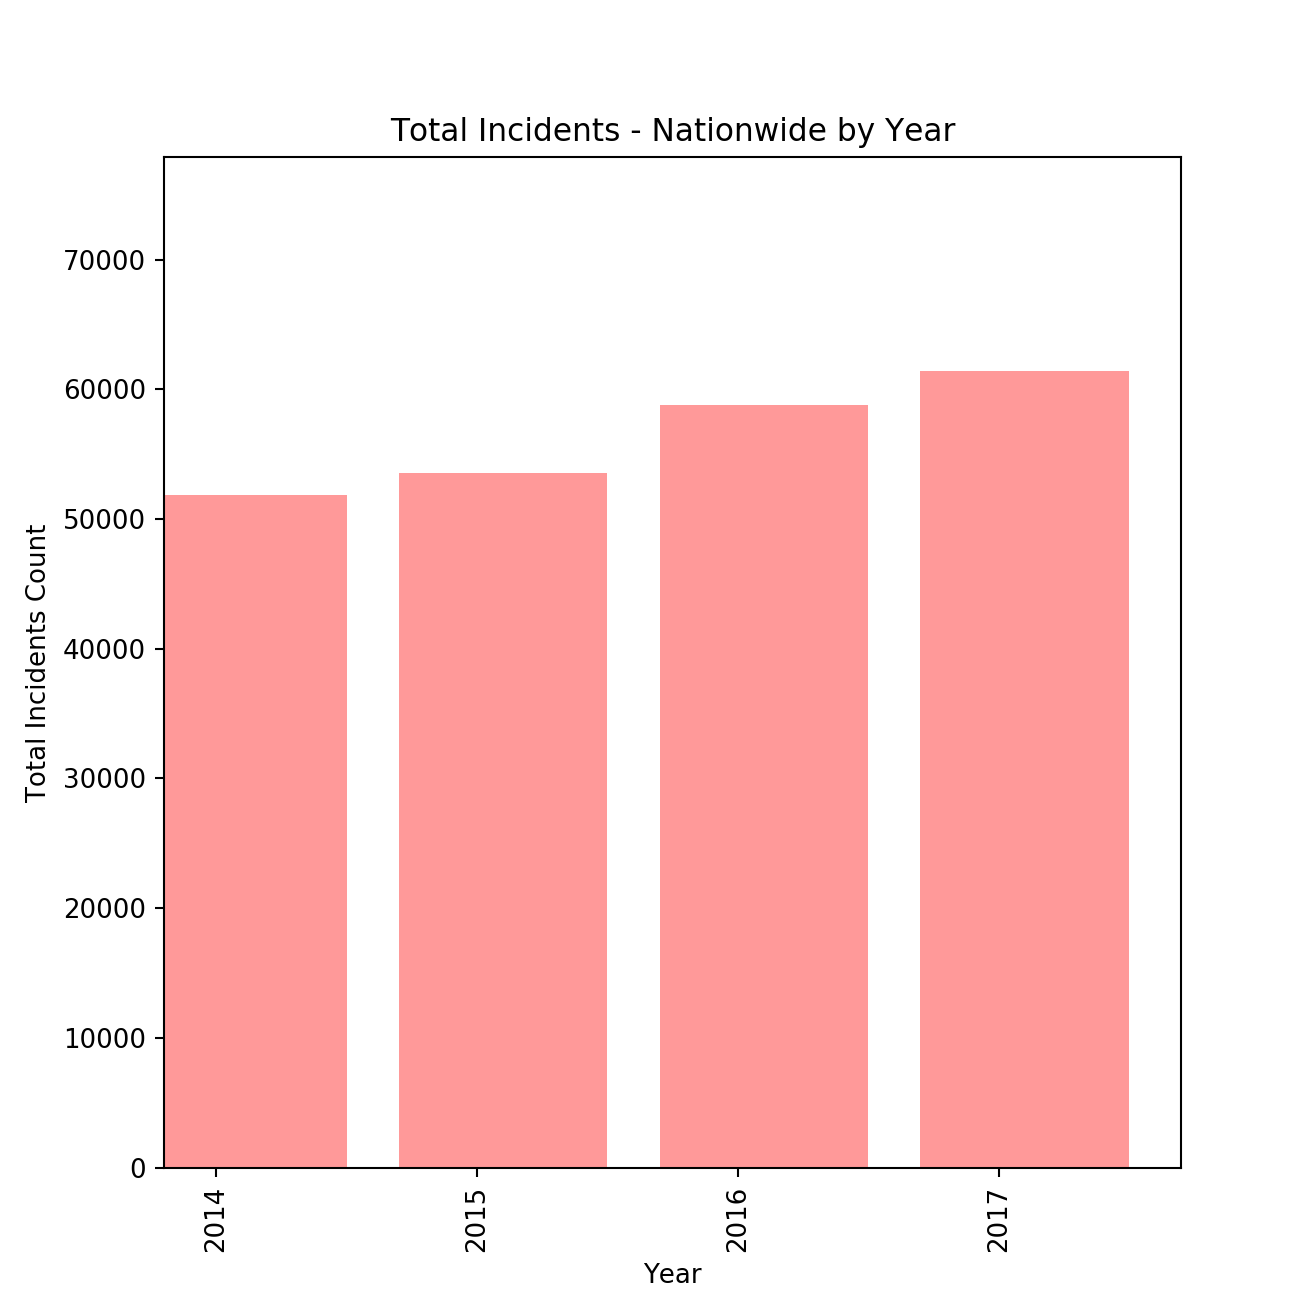

Text(0,0.5,'Total Incidents Count')

In [255]:
plt.figure(figsize=(7,7))
plt.bar(x_axis, year_counts["Total Incidents"], color='red', alpha=0.4, align="edge")
plt.xticks(tick_locations, year_counts["Year"], rotation="vertical")

plt.xlim(0.10000, len(x_axis))
plt.ylim(0, max(year_counts["Total Incidents"])+16500)

plt.title("Total Incidents - Nationwide by Year")
plt.xlabel("Year")
plt.ylabel("Total Incidents Count")

In [256]:
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


In [257]:
incident_data.columns

Index(['Year', 'State Name', 'Number of Killed', 'Number of Injured',
       'Incident Info', 'Latitude', 'Longitude', 'Participant Age',
       'Participant Age Group', 'Participant Gender',
       'Participant Relationship', 'Participant Status', 'Participant Type',
       'State Abbr'],
      dtype='object')

In [258]:
reduced_incident_pd = incident_data.iloc[:, [
    0, 1, 2, 3]]
reduced_incident_pd.head()

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [259]:
reduced_incident_pd["Total Incidents"] = reduced_incident_pd["Number of Killed"] + reduced_incident_pd["Number of Injured"] 
 

C:\Users\wgdav\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [260]:
# Create DataFrame total incident by year 2013
group_2013 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2013]
group_2013.head()
del group_2013['Number of Killed']
del group_2013['Number of Injured']
group_2013.head()
 
state_summary_2013 = group_2013.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2013')
state_summary_2013['Total Incidents 2013'].astype(int)
state_summary_2013.head()

,State Name,Total Incidents 2013
0,Alabama,2
1,Arizona,5
2,California,39
3,Colorado,3
4,Connecticut,3


In [261]:
group_2014 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2014]
group_2014.head()
del group_2014['Number of Killed']
del group_2014['Number of Injured']
group_2014.head()
 
state_summary_2014 = group_2014.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2014')
state_summary_2014['Total Incidents 2014'].astype(int)
state_summary_2014.head()

,State Name,Total Incidents 2014
0,Alabama,1318
1,Alaska,146
2,Arizona,556
3,Arkansas,572
4,California,3732


In [262]:
group_2015 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2015]
group_2015.head()
del group_2015['Number of Killed']
del group_2015['Number of Injured']
group_2015.head()


state_summary_2015 = group_2015.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2015')
state_summary_2015['Total Incidents 2015'].astype(int)
state_summary_2015.head()

,State Name,Total Incidents 2015
0,Alabama,1034
1,Alaska,380
2,Arizona,480
3,Arkansas,538
4,California,3234


In [263]:
group_2016 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2016]
group_2016.head()
del group_2016['Number of Killed']
del group_2016['Number of Injured']
group_2016.head()

state_summary_2016 = group_2016.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2016')
state_summary_2016['Total Incidents 2016'].astype(int)
state_summary_2016.head()

,State Name,Total Incidents 2016
0,Alabama,1309
1,Alaska,445
2,Arizona,554
3,Arkansas,720
4,California,3617


In [264]:
group_2017 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2017]
group_2017.head()
del group_2017['Number of Killed']
del group_2017['Number of Injured']
group_2017.head()

state_summary_2017 = group_2017.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2017')
state_summary_2017['Total Incidents 2017'].astype(int)
state_summary_2017.head()

,State Name,Total Incidents 2017
0,Alabama,1461
1,Alaska,317
2,Arizona,587
3,Arkansas,820
4,California,4588


In [265]:
combined_state_year = pd.merge(state_summary_2013, state_summary_2014, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2015, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2016, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2017, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , census_data, how='outer', on='State Name')
combined_state_year = combined_state_year.rename(columns={"2013":"Population 2013","2014":"Population 2014","2015":"Population 2015", "2016":"Population 2016", "2017": "Population 2017"})

combined_state_year.fillna(0, inplace=True)
combined_state_year.head(53)

del combined_state_year['Total Incidents 2013']
del combined_state_year['Population 2013']
combined_state_year.head()

,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017
0,Alabama,1318.0,1034.0,1309.0,1461.0,4849377,4858979,4863300,4874747
1,Arizona,556.0,480.0,554.0,587.0,6731484,6828065,6931071,7016270
2,California,3732.0,3234.0,3617.0,4588.0,38802500,39144818,39250017,39536653
3,Colorado,556.0,788.0,812.0,809.0,5355866,5456574,5540545,5607154
4,Connecticut,583.0,737.0,803.0,780.0,3596677,3590886,3576452,3588184


In [266]:
combined_state_year['Incidents 2014 per Capita'] = (combined_state_year['Total Incidents 2014'] / combined_state_year['Population 2014'] * 10000)
combined_state_year['Incidents 2015 per Capita'] = (combined_state_year['Total Incidents 2015'] / combined_state_year['Population 2015'] * 10000)
combined_state_year['Incidents 2016 per Capita'] = (combined_state_year['Total Incidents 2016'] / combined_state_year['Population 2016'] * 10000)
combined_state_year['Incidents 2017 per Capita'] = (combined_state_year['Total Incidents 2017'] / combined_state_year['Population 2017'] * 10000)

combined_state_year 
combined_state_year['Incidents 2017 per Capita'] = combined_state_year['Incidents 2017 per Capita'].apply(round)
combined_state_year['Incidents 2016 per Capita'] = combined_state_year['Incidents 2016 per Capita'].apply(round)
combined_state_year['Incidents 2015 per Capita'] = combined_state_year['Incidents 2015 per Capita'].apply(round)
combined_state_year['Incidents 2014 per Capita'] = combined_state_year['Incidents 2014 per Capita'].apply(round)
combined_state_year


,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017,Incidents 2014 per Capita,Incidents 2015 per Capita,Incidents 2016 per Capita,Incidents 2017 per Capita
0,Alabama,1318.0,1034.0,1309.0,1461.0,4849377,4858979,4863300,4874747,3,2,3,3
1,Arizona,556.0,480.0,554.0,587.0,6731484,6828065,6931071,7016270,1,1,1,1
2,California,3732.0,3234.0,3617.0,4588.0,38802500,39144818,39250017,39536653,1,1,1,1
3,Colorado,556.0,788.0,812.0,809.0,5355866,5456574,5540545,5607154,1,1,1,1
4,Connecticut,583.0,737.0,803.0,780.0,3596677,3590886,3576452,3588184,2,2,2,2
5,Delaware,493.0,366.0,328.0,389.0,935614,945934,952065,961939,5,4,3,4
6,District of Columbia,838.0,538.0,497.0,1142.0,658893,672228,681170,693972,13,8,7,16
7,Florida,3138.0,2702.0,4201.0,4156.0,19893297,20271272,20612439,20984400,2,1,2,2
8,Georgia,2032.0,2767.0,1708.0,1994.0,10097343,10214860,10310371,10429379,2,3,2,2
9,Illinois,3095.0,3456.0,5055.0,5089.0,12880580,12859995,12801539,12802023,2,3,4,4


In [169]:
combined_state_year.to_csv("../Output/Incident_State_year_count.csv", index=True, header=True)

In [195]:
#sum incidents
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
 